In [2]:
#Raj Giri
#!pip install keras

In [3]:
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
import random
import matplotlib.pyplot as plt


Using TensorFlow backend.


### This notebook uses keras and tenserflow library to make linear prediction of  growth rate of companies shares  with neural network from the PC of data which was processed in R before importing to this notebook.

In [5]:
#Shares.csv is the data where we changed the representation of data at the end of section 5 in out project
#The data includes all 737 PC and response variable growth_rate.
df = pd.read_csv("new_data.csv")
df.head()

,Unnamed: 0,tic,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737,growth_rate
0,1,AIR,3.436783,-0.226331,0.421909,-0.632709,1.554748,-0.564947,2.075328,-4.779531,...,9.315465e-16,2.097931e-16,7.667478e-16,-9.974660e-16,-2.463307e-16,6.765422e-17,6.288373e-16,-2.298509e-17,1.778092e-16,0.050746
1,2,AAL,-12.031750,0.804221,5.917291,-0.801826,6.720588,-3.043645,0.354583,-0.911027,...,-1.196959e-16,-2.086005e-16,3.400058e-16,-1.110223e-16,7.840950e-16,-2.393918e-16,6.297046e-16,-1.886512e-16,-1.279359e-16,-0.382856
2,3,CECE,3.952829,-0.755453,0.075395,-0.382400,1.477339,-1.629387,1.741269,-4.018828,...,-2.012279e-16,3.092145e-16,-1.283695e-16,2.519686e-16,2.775558e-17,1.500536e-16,7.372575e-17,1.140581e-16,1.192622e-16,0.315789
3,4,ASA,3.655771,-0.798300,-0.574748,-0.947220,-1.096444,0.391605,-0.916705,1.840425,...,3.252607e-16,-3.881444e-16,1.838807e-16,1.071192e-16,-3.226586e-16,2.168404e-16,-3.001072e-16,1.309716e-16,-2.051311e-16,-0.216474
4,5,AVX,2.927943,-0.710629,-0.164044,-0.531762,-0.381443,2.078491,-0.219874,0.583290,...,2.636780e-16,6.880347e-16,-2.636780e-16,-7.303186e-16,2.012279e-16,-3.105155e-16,4.449566e-16,-2.090342e-16,2.792905e-16,-0.118497


In [6]:
data = df.iloc[:,1:]
train_data = data.iloc[:,1:-1]
response_data = data.iloc[:,-1]

#Spliting data into training 75% and 25% testing
train_X,test_X,train_Y, test_Y= train_test_split(train_data,response_data, test_size = 0.25, random_state = 100)
train_Y.head()
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

random.seed(123)
NN_model.fit(train_X, train_Y, epochs=300, validation_split = 0.2)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               188928    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [25]:
# data.to_csv ('insample_prediction.csv', index = False, header=True)

In [26]:
#p.to_csv ('outsample_prediction.csv', index = False, header=True)

In [13]:
#Prediction on training data
predictions_train = NN_model.predict(train_X)
MAE_train = np.mean(abs(predictions_train.flatten() - train_Y))
recommended_portfolio_train = np.sort(predictions_train.flatten(),axis = None)[-12:]
profit_training = sum((1+recommended_portfolio_train) * (1000000/12)) - 1000000
profit_rate_training = profit_training / 1000000
train_summary = pd.DataFrame({"MAE_train" : [MAE_train],
              "profit_train" : [np.round(profit_training,3)],
             "profit_rate_train" : [profit_rate_training]})
train_summary

,MAE_train,profit_train,profit_rate_train
0,0.080862,3039803.25,3.039803


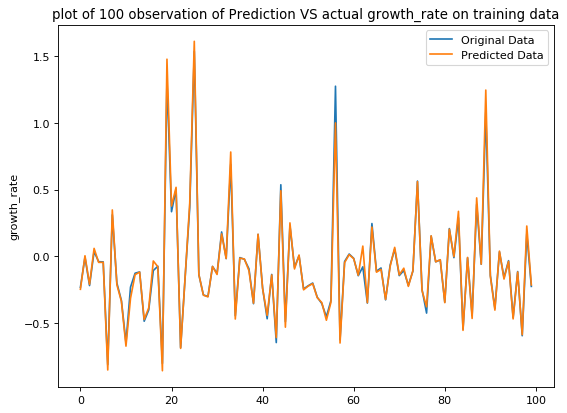

In [14]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(100),train_Y[200:300],label="Original Data")
plt.plot(range((100)),predictions_train[200:300],label="Predicted Data")
plt.ylabel('growth_rate')
plt.xlabel('')
plt.legend(loc='best')
plt.title('plot of 100 observation of Prediction VS actual growth_rate on training data')
plt.show()

In [15]:
#Prediction on test data
prediction_test = NN_model.predict(test_X)
MAE_test = np.mean(abs(prediction_test.flatten() - test_Y))
recommended_portfolio_test = np.sort(prediction_test.flatten(),axis = None)[-12:]
profit = sum((1+recommended_portfolio_test) * (1000000/12)) - 1000000
profit_rate = profit / 1000000
test_summary = pd.DataFrame({"MAE_test" : [MAE_test],
              "profit_test" : [np.round(profit,2)],
             "profit_rate_test" : [profit_rate]})
test_summary


,MAE_test,profit_test,profit_rate_test
0,0.291454,1185867.41,1.185867


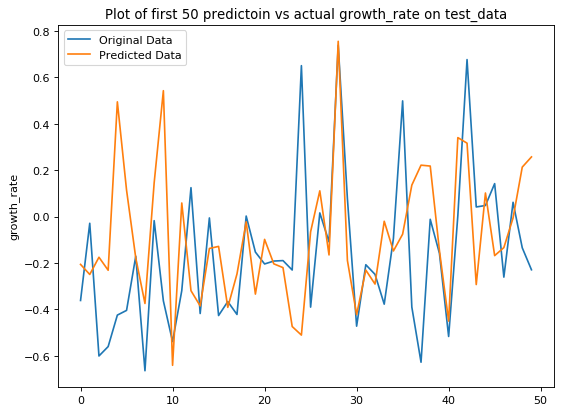

In [16]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(50),test_Y[150:200],label="Original Data")
plt.plot(range((50)),prediction_test[150:200],label="Predicted Data")
plt.ylabel('growth_rate')
plt.xlabel('')
plt.title('Plot of first 50 predictoin vs actual growth_rate on test_data')
plt.legend(loc='best')
plt.show()

In [17]:
#Rec.csv is the data that professor gave at end of notebook to predict portfolio recommendation from 2018 company fundamentals
data_fund_2018 = pd.read_csv('neural_recommend.csv')
format_test = data_fund_2018.iloc[:,2:]
format_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC728,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737
0,3.472287,-0.084258,0.373416,-0.708036,1.514166,-0.579639,2.026183,-4.621171,2.404449,0.922941,...,-6.223320e-16,-5.877460e-16,3.378374e-16,1.682682e-16,7.780235e-16,-5.057278e-16,-7.548216e-16,-7.459311e-16,4.926615e-16,-4.570996e-16
1,2.796849,-0.100005,0.365191,-0.389115,0.853414,-1.655226,1.067232,-2.387928,-0.077713,0.003418,...,1.743397e-16,2.560886e-16,-7.845287e-16,-5.637851e-17,2.160598e-15,-1.149037e-15,2.870967e-16,-3.139849e-16,2.567391e-16,-2.923009e-16
2,3.986999,-0.653669,-0.566531,-0.989951,-1.626589,2.107879,-0.752512,2.015109,2.756417,1.335420,...,-1.708703e-16,-4.216462e-16,6.722053e-17,6.331741e-17,8.864437e-16,-8.951173e-16,2.666053e-16,-5.603157e-16,2.246467e-16,-2.116363e-16
3,3.642196,-0.563078,0.521477,-0.587180,1.099129,-0.658786,2.134298,-4.816553,2.523821,0.889389,...,-5.499073e-16,-5.526178e-16,2.445960e-16,1.231654e-16,7.645794e-16,-1.064253e-15,3.224146e-16,-3.590878e-16,3.001072e-16,-5.694230e-16
4,-4.313079,0.963511,1.430965,-1.838512,-1.345958,2.144800,-0.330502,1.910505,-3.383656,0.025646,...,1.283695e-16,-4.681585e-16,-4.636048e-16,1.561251e-17,1.992764e-15,-8.187895e-16,5.255535e-16,-4.180684e-16,3.716645e-16,-3.690624e-16


In [18]:
new_pred = NN_model.predict(format_test)
new_pred[:10]

array([[-0.2640651 ],
       [-0.1992589 ],
       [-0.02575577],
       [-0.25136676],
       [ 0.26998144],
       [-0.22592732],
       [ 0.3033056 ],
       [-0.26138192],
       [ 0.35783654],
       [-0.1932139 ]], dtype=float32)

In [19]:
data_fund_2018["Prediction"] = new_pred
data_fund_2018.iloc[:,[0,1,-1]]

,tic,conm,Prediction
0,AIR,AAR CORP,-0.264065
1,ABM,ABM INDUSTRIES INC,-0.199259
2,AMSWA,AMERICAN SOFTWARE -CL A,-0.025756
3,AXR,AMREP CORP,-0.251367
4,ADI,ANALOG DEVICES,0.269981
...,...,...,...
225,VRA,VERA BRADLEY INC,0.081449
226,TLYS,TILLY'S INC,0.618937
227,FRG,FRANCHISE GROUP INC,0.587894
228,GWRE,GUIDEWIRE SOFTWARE INC,0.422181


In [20]:
recommendation = data_fund_2018.sort_values(by=['Prediction'],ascending=False).head(12)
recommendation = recommendation.iloc[:,[0,1,-1]]
recommendation

,tic,conm,Prediction
212,FIVE,FIVE BELOW INC,1.124906
150,OKTA,OKTA INC,1.036205
220,ULTA,ULTA BEAUTY INC,0.952985
156,MDB,MONGODB INC,0.878591
217,LULU,LULULEMON ATHLETICA INC,0.828556
113,CSCO,CISCO SYSTEMS INC,0.812197
209,SPLK,SPLUNK INC,0.755882
137,COUP,COUPA SOFTWARE INC,0.747670
210,ASPU,ASPEN GROUP INC,0.741759
167,PLAN,ANAPLAN INC,0.719458


In [21]:
recommendation.to_csv("neural_recommendation.csv",index = False, header=True)